Step 1: Setup and Upload Files

In [2]:
# Mount Google Drive to upload files
from google.colab import drive
drive.mount('/content/drive')

# Navigate to the directory where your files are stored
!ls '/content/drive/My Drive/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
'Colab Notebooks'
 sample_submission.csv
 Social_Network_Ads.csv.xls
 test.csv
 train.csv


Step 2: Import Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical

Step 3: Load Data

In [4]:
# Load train and test data
train = pd.read_csv('/content/drive/My Drive/train.csv')
test = pd.read_csv('/content/drive/My Drive/test.csv')
sample_submission = pd.read_csv('/content/drive/My Drive/sample_submission.csv')

# Split data into features and labels
X = train.iloc[:, 1:].values  # Pixel values
y = train.iloc[:, 0].values   # Labels (digits)

# Normalize the pixel values (0-255 -> 0-1)
X = X / 255.0
test = test / 255.0

# Reshape data for CNN (28x28x1)
X = X.reshape(-1, 28, 28, 1)
test = test.values.reshape(-1, 28, 28, 1)

# One-hot encode labels
y = to_categorical(y, num_classes=10)


Step 4: Train-Test Split

In [5]:
# Split into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

Step 5: Build CNN Model

In [6]:
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Step 6: Train the Model

In [7]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=15,
    batch_size=128,
    verbose=1
)

Epoch 1/15
263/263 ━━━━━━━━━━━━━━━━━━━━ 38s 135ms/step - accuracy: 0.6999 - loss: 0.9021 - val_accuracy: 0.9625 - val_loss: 0.1247
Epoch 2/15
263/263 ━━━━━━━━━━━━━━━━━━━━ 34s 131ms/step - accuracy: 0.9473 - loss: 0.1733 - val_accuracy: 0.9754 - val_loss: 0.0783
Epoch 3/15
263/263 ━━━━━━━━━━━━━━━━━━━━ 43s 137ms/step - accuracy: 0.9622 - loss: 0.1230 - val_accuracy: 0.9818 - val_loss: 0.0603
Epoch 4/15
263/263 ━━━━━━━━━━━━━━━━━━━━ 39s 128ms/step - accuracy: 0.9684 - loss: 0.1025 - val_accuracy: 0.9836 - val_loss: 0.0513
Epoch 5/15
263/263 ━━━━━━━━━━━━━━━━━━━━ 41s 129ms/step - accuracy: 0.9716 - loss: 0.0939 - val_accuracy: 0.9854 - val_loss: 0.0467
Epoch 6/15
263/263 ━━━━━━━━━━━━━━━━━━━━ 41s 127ms/step - accuracy: 0.9760 - loss: 0.0761 - val_accuracy: 0.9863 - val_loss: 0.0421
Epoch 7/15
263/263 ━━━━━━━━━━━━━━━━━━━━ 40s 123ms/step - accuracy: 0.9790 - loss: 0.0676 - val_accuracy: 0.9881 - val_loss: 0.0384
Epoch 8/15
263/263 ━━━━━━━━━━━━━━━━━━━━ 42s 126ms/step - accuracy: 0.9806 - loss: 0

Step 7: Evaluate the Model

In [8]:
# Evaluate on validation data
val_loss, val_acc = model.evaluate(X_val, y_val)
print(f"Validation Accuracy: {val_acc * 100:.2f}%")

263/263 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.9892 - loss: 0.0332
Validation Accuracy: 99.00%


Step 8: Generate Predictions

In [9]:
# Predict on test data
predictions = model.predict(test)
predicted_labels = np.argmax(predictions, axis=1)

# Create submission file
submission = pd.DataFrame({'ImageId': np.arange(1, len(predicted_labels) + 1), 'Label': predicted_labels})
submission.to_csv('/content/drive/My Drive/mnist_submission.csv', index=False)
print("Submission file saved!")


875/875 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step
Submission file saved!


Step 9: Plot Training and Validation Accuracy

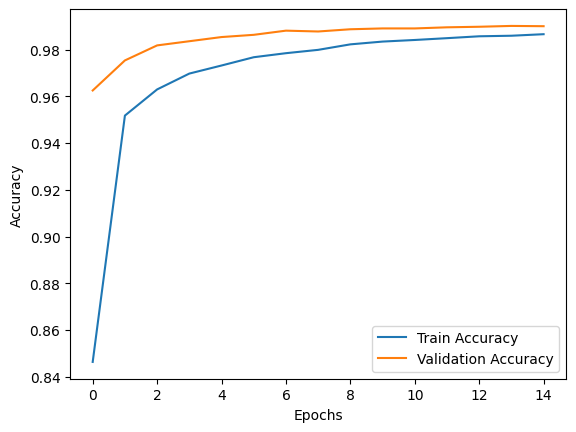

In [10]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
